# Exploratory Data Analysis I: Twitch Game Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from scipy.stats import stats 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
twitchdata1 = pd.read_csv("Twitch_game_data.csv")
df1 = twitchdata1.copy()
df1["Hours_Streamed"] = df1["Hours_Streamed"].str.replace(' ', '')
df1["Hours_Streamed"] = df1["Hours_Streamed"].str.replace('hours','').astype('int')
df1

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
12745,196,Cuphead,4,2021,795329,31721,90364,98,7795,1106,44,25.07
12746,197,Hades,4,2021,794472,52755,36447,152,8663,1104,73,15.06
12747,198,Epic Seven,4,2021,778750,18362,11670,47,997,1083,25,42.41
12748,199,Pok<U+00E9>mon Platinum,4,2021,777305,22380,61580,76,2837,1081,31,34.73


In [21]:
df1[(df1.Game == "Just Chatting")]

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
6380,31,Just Chatting,9,2018,3791420,37737,105145,613,13920,5273,52,100.47
6553,4,Just Chatting,10,2018,37306055,443473,156436,1163,76354,50210,596,84.12
6752,3,Just Chatting,11,2018,45819619,533962,227149,1213,91574,63726,742,85.81
6952,3,Just Chatting,12,2018,54386753,684341,223139,1847,115690,73198,921,79.47
7152,3,Just Chatting,1,2019,59064487,803672,184542,1757,134201,79494,1081,73.49
7353,4,Just Chatting,2,2019,51698098,733647,182185,2336,121349,77046,1093,70.47
7554,5,Just Chatting,3,2019,58236586,878360,211835,1781,135026,78380,1182,66.30
7753,4,Just Chatting,4,2019,58637850,862890,219754,1848,135011,81554,1200,67.96
7953,4,Just Chatting,5,2019,60652701,894976,194008,1834,139132,81632,1204,67.77
8152,3,Just Chatting,6,2019,61663846,908320,234098,2724,145157,85763,1263,67.89


In [52]:
df1.dtypes

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_Streamed        int64
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object

In [4]:
df1.isnull().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

There is just one missing data, so let's drop it.

In [5]:
df1.dropna(inplace = True)

In [6]:
df1.Year = df1.Year.astype(CategoricalDtype(ordered = True))
df1.Month = df1.Month.astype(CategoricalDtype(ordered = True))

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,12749.0,1.005932e+02,5.782104e+01,1.00,50.00,101.00,151.0,2.000000e+02
Hours_watched,12749.0,4.276021e+06,1.506833e+07,89811.00,332588.00,718122.00,1975274.0,3.445520e+08
Peak_viewers,12749.0,4.966377e+04,1.182887e+05,441.00,7656.00,18349.00,41709.0,3.123208e+06
Peak_channels,12749.0,5.251787e+02,2.543382e+03,1.00,47.00,109.00,286.0,1.298600e+05
Streamers,12749.0,1.607263e+04,5.354264e+04,0.00,1345.00,3767.00,9889.0,1.013029e+06
Avg_viewers,12749.0,5.869388e+03,2.070980e+04,120.00,456.00,982.00,2716.0,4.792090e+05
Avg_channels,12749.0,1.942722e+02,7.202922e+02,0.00,15.00,38.00,108.0,1.378900e+04
Avg_viewer_ratio,12749.0,8.436369e+01,3.793660e+02,2.27,15.96,29.07,58.1,1.360187e+04


<AxesSubplot:>

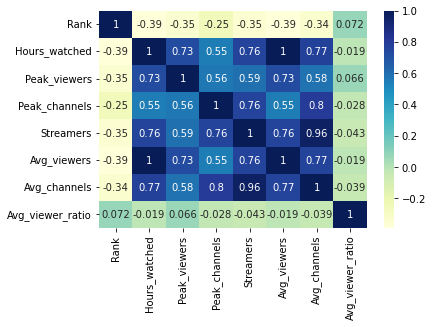

In [8]:
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

In [56]:
df1['Date'] = df1.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}", '%Y-%m'),axis=1)
df1.drop(['Month','Year'], axis='columns', inplace = True)

Taking a look at the 10 games with the most streamers in total:

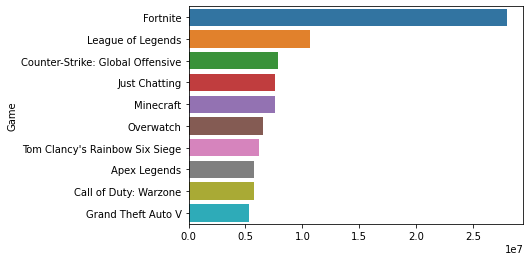

In [23]:
df1TotalStreamers = df1.groupby('Game').Streamers.sum().sort_values(ascending=False)
df1TotalStreamers = df1TotalStreamers[0:10]
ax=sns.barplot(x=df1TotalStreamers.values, y=df1TotalStreamers.index)

In [24]:
df1TotalStreamers

Game
Fortnite                            28018115
League of Legends                   10656186
Counter-Strike: Global Offensive     7815689
Just Chatting                        7605690
Minecraft                            7599346
Overwatch                            6527624
Tom Clancy's Rainbow Six Siege       6201295
Apex Legends                         5783305
Call of Duty: Warzone                5724957
Grand Theft Auto V                   5298021
Name: Streamers, dtype: int64

Taking a look at the 10 games with the most streamers over time:

<AxesSubplot:xlabel='Date', ylabel='Streamers'>

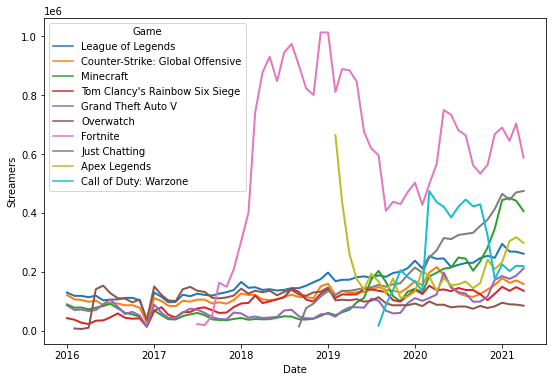

In [61]:
df1Streamers=df1[df1['Game'].isin(df1TotalStreamers.index)]
fig,ax=plt.subplots(figsize=(9, 6))
sns.lineplot(ax=ax,data=df1Streamers, x="Date", y="Streamers",hue="Game",linewidth = 2)

Taking a look at the 10 most streamed games in the dataset in total:

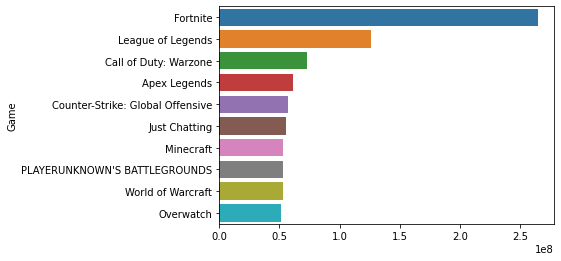

In [53]:
df1TotalStream = df1.groupby('Game').Hours_Streamed.sum().sort_values(ascending=False)
df1TotalStream = df1TotalStream[0:10]
ax=sns.barplot(x=df1TotalStream.values, y=df1TotalStream.index)

Taking a look at the 10 most streamed games in the dataset over time:

<AxesSubplot:xlabel='Date', ylabel='Hours_Streamed'>

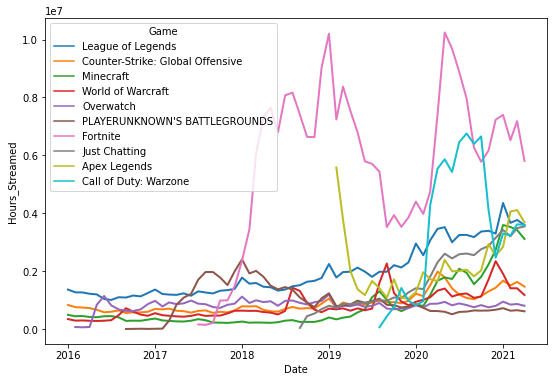

In [58]:
df1Stream=df1[df1['Game'].isin(df1TotalStream.index)]
fig,ax=plt.subplots(figsize=(9, 6))
sns.lineplot(ax=ax,data=df1Stream, x="Date", y="Hours_Streamed",hue="Game",linewidth = 2)

Taking a look at the 10 most watched games of the dataset in total:

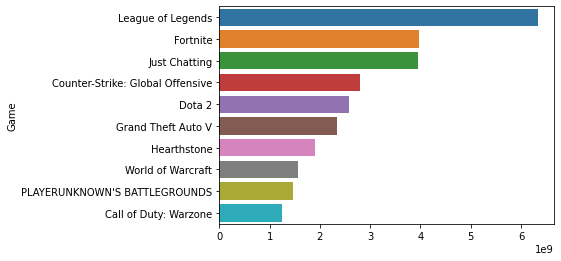

In [10]:
df1TotalWatch = df1.groupby('Game').Hours_watched.sum().sort_values(ascending=False)
df1TotalWatch = df1TotalWatch[0:10]
ax=sns.barplot(x=df1TotalWatch.values, y=df1TotalWatch.index)

In [11]:
df1TotalWatch

Game
League of Legends                   6343004947
Fortnite                            3981043561
Just Chatting                       3945461554
Counter-Strike: Global Offensive    2790519858
Dota 2                              2587271922
Grand Theft Auto V                  2343952719
Hearthstone                         1895659901
World of Warcraft                   1557201636
PLAYERUNKNOWN'S BATTLEGROUNDS       1462843766
Call of Duty: Warzone               1238898501
Name: Hours_watched, dtype: int64

Taking a look at the 10 most watched games of the dataset over time:

<AxesSubplot:xlabel='Date', ylabel='Hours_watched'>

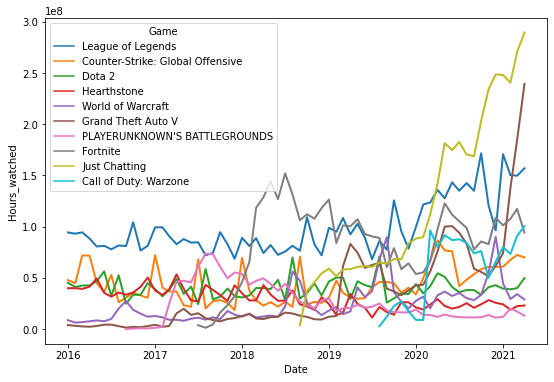

In [11]:
df1Watch=df1[df1['Game'].isin(df1TotalWatch.index)]
fig,ax=plt.subplots(figsize=(9, 6))
sns.lineplot(ax=ax,data=df1Watch, x="Date", y="Hours_watched",hue="Game",linewidth = 2)

# Exploratory Data Analysis II: Twitch Global Data

In [12]:
twitchdata2 = pd.read_csv("Twitch_global_data.csv")
df2 = twitchdata2.copy()
df2

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149"
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134"
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234"
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282"
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424"
...,...,...,...,...,...,...,...,...
59,2020,12,1877319317,2526674,4860624,22089295,107006,"32,840"
60,2021,1,2173794168,2925698,6516666,25614207,119448,"34,551"
61,2021,2,1979581961,2950196,5274617,24319608,122763,"34,594"
62,2021,3,2173794168,2925698,6516666,25614207,119448,"34,551"


In [13]:
df2.dtypes

year               int64
Month              int64
Hours_watched      int64
Avg_viewers        int64
Peak_viewers       int64
Streams            int64
Avg_channels       int64
Games_streamed    object
dtype: object

In [14]:
df2.isnull().sum()

year              0
Month             0
Hours_watched     0
Avg_viewers       0
Peak_viewers      0
Streams           0
Avg_channels      0
Games_streamed    0
dtype: int64

<AxesSubplot:>

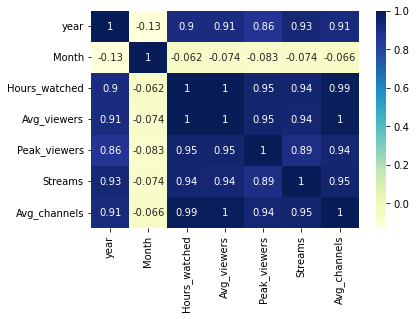

In [15]:
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)